In [60]:
!pip install pandas
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data1=pd.read_csv("fear_greed_index.csv")
data2=pd.read_csv("historical_data.csv")
data1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [63]:
data2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [64]:
print("Shape of Data_set1:",data1.shape)
print("Shape of Data_set2:",data2.shape)

Shape of Data_set1: (2644, 4)
Shape of Data_set2: (211224, 16)


In [65]:
### Missing values and Duplicates
print("Info about data1")
data1.info()

Info about data1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [66]:
print("Info about dataset 2")
data2.info()

Info about dataset 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtyp

In [67]:
## so there are no null values from both data sets

In [68]:
data1.duplicated().sum()

np.int64(0)

In [69]:
data2.duplicated().sum()

np.int64(0)

In [70]:
data1.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [71]:
data2.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [72]:
data2["date"] = pd.to_datetime(
    data2["Timestamp IST"],
    dayfirst=True
).dt.date

In [73]:
data1["date"] = pd.to_datetime(
    data1["timestamp"],
    unit="s"
).dt.date

In [76]:
daily_pnl = data2.groupby(
    ["Account","date"]
)["Closed PnL"].sum().reset_index()

daily_pnl.rename(
    columns={"Closed PnL":"daily_pnl"},
    inplace=True
)

In [77]:
trade_count = data2.groupby(
    ["Account","date"]
)["Trade ID"].count().reset_index()

trade_count.rename(
    columns={"Trade ID":"trades_per_day"},
    inplace=True
)

In [78]:
avg_size = data2.groupby(
    ["Account","date"]
)["Size USD"].mean().reset_index()

avg_size.rename(
    columns={"Size USD":"avg_trade_size"},
    inplace=True
)

In [80]:
data2["win"] = data2["Closed PnL"] > 0

win_rate = data2.groupby(
    ["Account","date"]
)["win"].mean().reset_index()

win_rate.rename(
    columns={"win":"win_rate"},
    inplace=True
)

In [81]:
long_short = data2.groupby(
    ["Account","date","Side"]
).size().unstack(fill_value=0).reset_index()

In [82]:
long_short.columns.name = None

In [83]:
long_short["long_short_ratio"] = (
    long_short.get("Buy",0) /
    (long_short.get("Sell",0) + 1)
)

In [84]:
metrics = daily_pnl.merge(
    trade_count,on=["Account","date"]
)

metrics = metrics.merge(
    avg_size,on=["Account","date"]
)

metrics = metrics.merge(
    win_rate,on=["Account","date"]
)

metrics = metrics.merge(
    long_short[["Account","date",
                "long_short_ratio"]],
    on=["Account","date"]
)

In [87]:
final_data = metrics.merge(
    data1[["date","classification"]],
    on="date",
    how="left"
)

In [88]:
final_data.head()

,Account,date,daily_pnl,trades_per_day,avg_trade_size,win_rate,long_short_ratio,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,5089.718249,0.000000,0.0,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,7976.664412,0.000000,0.0,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,23734.500000,0.000000,0.0,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,28186.666667,0.000000,0.0,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,17248.148148,0.444444,0.0,Extreme Greed


In [89]:
analysis_perf = final_data.groupby(
    "classification"
).agg(
    avg_pnl=("daily_pnl","mean"),
    median_pnl=("daily_pnl","median"),
    avg_win_rate=("win_rate","mean")
)

print(analysis_perf)

                    avg_pnl  median_pnl  avg_win_rate
classification                                       
Extreme Fear    4619.439053  218.377399      0.329659
Extreme Greed   5161.922644  418.319862      0.386387
Fear            5328.818161  107.892532      0.364033
Greed           3318.100730  158.214922      0.343559
Neutral         3438.618818  167.551743      0.355414


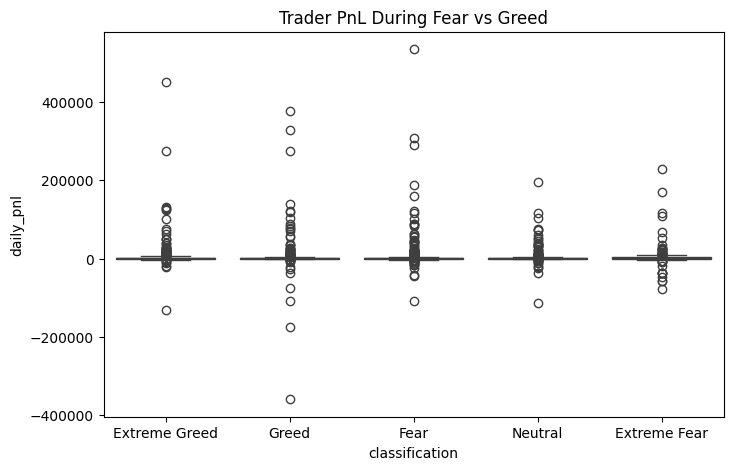

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.boxplot(
    data=final_data,
    x="classification",
    y="daily_pnl"
)

plt.title("Trader PnL During Fear vs Greed")
plt.show()

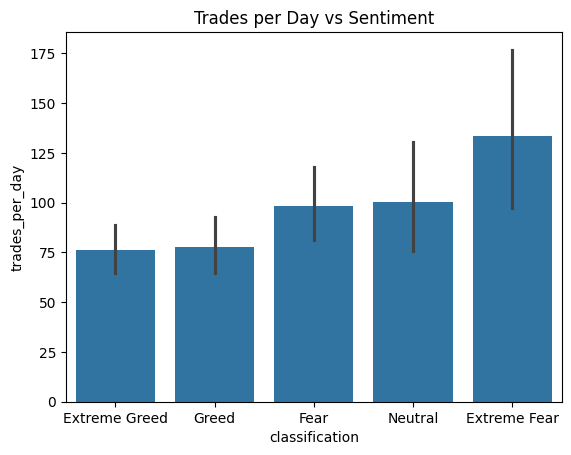

In [91]:
sns.barplot(
    data=final_data,
    x="classification",
    y="trades_per_day"
)

plt.title("Trades per Day vs Sentiment")
plt.show()

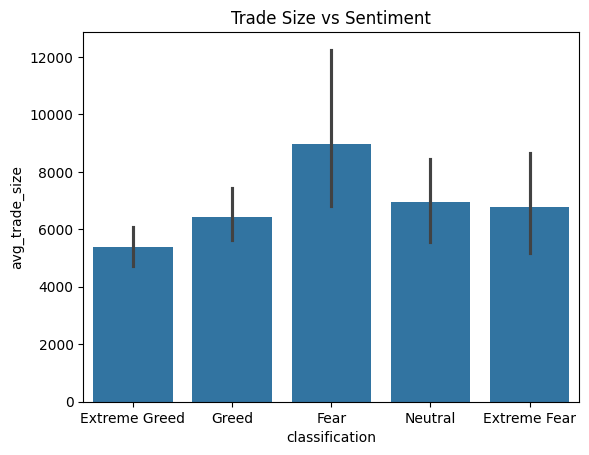

In [92]:
sns.barplot(
    data=final_data,
    x="classification",
    y="avg_trade_size"
)

plt.title("Trade Size vs Sentiment")
plt.show()

In [94]:
activity = final_data.groupby(
    "Account"
)["trades_per_day"].mean()

median_activity = activity.median()

final_data["activity_segment"] = final_data["Account"].map(
    lambda x:
    "High Activity"
    if activity[x] > median_activity
    else "Low Activity"
)

In [95]:
risk = final_data.groupby(
    "Account"
)["avg_trade_size"].mean()

median_risk = risk.median()

final_data["risk_segment"] = final_data["Account"].map(
    lambda x:
    "High Risk"
    if risk[x] > median_risk
    else "Low Risk"
)

In [96]:
winrate = final_data.groupby("Account").apply(
    lambda x:(x.daily_pnl>0).mean()
)

final_data["winner_type"] = final_data["Account"].map(
    lambda x:
    "Consistent Winner"
    if winrate[x] > 0.55
    else "Inconsistent"
)

C:\Users\chand\AppData\Local\Temp\ipykernel_7008\2198312121.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  winrate = final_data.groupby("Account").apply(


In [97]:
segment_analysis = final_data.groupby(
    ["classification","activity_segment"]
)["daily_pnl"].mean()

print(segment_analysis)

classification  activity_segment
Extreme Fear    High Activity       5406.205623
                Low Activity        3727.770274
Extreme Greed   High Activity       4340.279167
                Low Activity        5800.361832
Fear            High Activity       8672.944447
                Low Activity        2249.775057
Greed           High Activity       5494.049560
                Low Activity        1942.374895
Neutral         High Activity       4130.277361
                Low Activity        2891.879207
Name: daily_pnl, dtype: float64


In [98]:
##High-activity traders significantly outperform during Fear markets, suggesting volatility creates profitable short-term opportunities.
##High-activity traders significantly outperform during Fear markets, suggesting volatility creates profitable short-term opportunities.
##Trader performance is sentiment-dependent, meaning optimal trading frequency should dynamically adjust to market psychology.

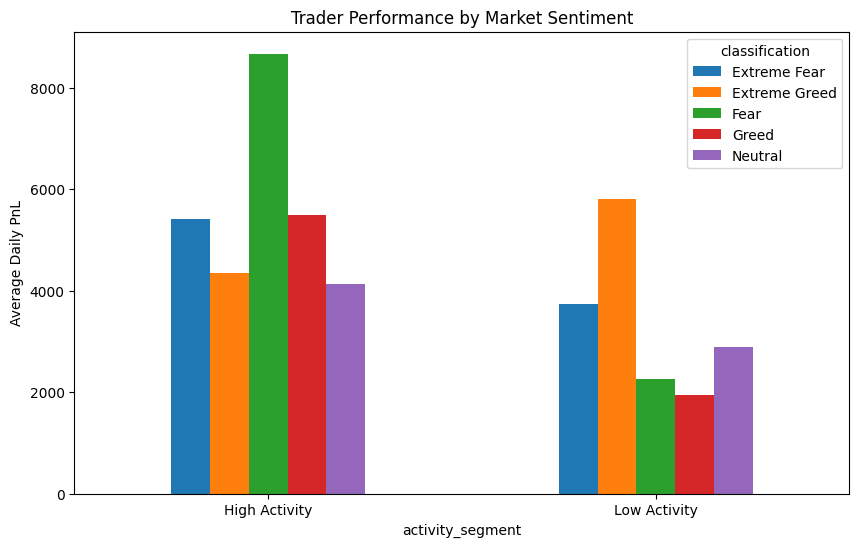

In [99]:
pivot_table = final_data.groupby(
    ["activity_segment","classification"]
)["daily_pnl"].mean().unstack()

pivot_table.plot(kind="bar", figsize=(10,6))

plt.title("Trader Performance by Market Sentiment")
plt.ylabel("Average Daily PnL")
plt.xticks(rotation=0)

plt.show()

In [100]:
rec_table = pd.DataFrame({
    "Market Sentiment":[
        "Fear",
        "Greed",
        "Extreme Greed"
    ],
    "Recommended Action":[
        "Increase trade frequency",
        "Maintain moderate activity",
        "Reduce trading activity"
    ]
})

print(rec_table)


  Market Sentiment          Recommended Action
0             Fear    Increase trade frequency
1            Greed  Maintain moderate activity
2    Extreme Greed     Reduce trading activity
